In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as ln


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
salaries_df = pd.read_csv('./data/2018-salaries.csv')
batting_stats_df = pd.read_csv('./data/standard-stats-9-21-2018.csv')

In [5]:
label_to_correlate = input()

HR


In [6]:
salaries_to_stats_df = pd.merge(salaries_df, batting_stats_df, left_on='Name', right_on='Name')

In [7]:
salaries_to_stats_df

,rank,Name,Team_x,POS,Salary,Years,Total Value,Avg Annual,#,Team_y,...,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG
0,--,Mike Trout,LAA,OF,"$34,083,333",6 (2015-20),"$144,500,000","$24,083,333",143,Angels,...,115.0,23.0,117.0,10.0,4.0,0.0,5.0,24.0,2.0,0.317
1,--,Albert Pujols,LAA,1B,"$27,000,000",10 (2012-21),"$240,000,000","$24,000,000",120,Angels,...,28.0,3.0,65.0,2.0,3.0,0.0,12.0,1.0,0.0,0.245
2,--,Joey Votto,CIN,1B,"$25,000,000",10 (2014-23),"$225,000,000","$22,500,000",52,Reds,...,104.0,6.0,95.0,9.0,3.0,0.0,15.0,1.0,0.0,0.288
3,--,Giancarlo Stanton,NYY,OF,"$25,000,000",13 (2015-27),"$325,000,000","$25,000,000",47,Yankees,...,63.0,4.0,203.0,8.0,10.0,0.0,16.0,5.0,0.0,0.261
4,--,J.D. Martinez,BOS,OF,"$23,750,000",5 (2018-22),"$110,000,000","$22,000,000",31,Red Sox,...,63.0,10.0,140.0,4.0,7.0,0.0,18.0,5.0,1.0,0.331
5,--,Joe Mauer,MIN,1B,"$23,000,000",8 (2011-18),"$184,000,000","$23,000,000",65,Twins,...,46.0,3.0,78.0,2.0,2.0,1.0,6.0,0.0,0.0,0.276
6,--,Ian Desmond,COL,1B,"$22,000,000",5 (2017-21),"$70,000,000","$14,000,000",25,Rockies,...,45.0,0.0,138.0,5.0,4.0,1.0,14.0,20.0,6.0,0.235
7,--,Bryce Harper,WSH,OF,"$21,625,000",1 (2018),"$21,625,000","$21,625,000",125,Nationals,...,123.0,15.0,160.0,6.0,8.0,0.0,6.0,12.0,2.0,0.247
8,--,Eric Hosmer,SD,1B,"$21,625,000",8 (2018-25),"$144,000,000","$18,000,000",55,Padres,...,56.0,8.0,137.0,0.0,1.0,0.0,17.0,6.0,4.0,0.251
9,--,Matt Kemp,LAD,OF,"$21,500,000",8 (2012-19),"$160,000,000","$20,000,000",36,Dodgers,...,36.0,2.0,110.0,1.0,7.0,0.0,13.0,0.0,0.0,0.285


In [8]:
df = salaries_to_stats_df.loc[:, ['Name','Salary', label_to_correlate]]
df['Salary']=(df['Salary'].replace( '[\$,)]','', regex=True )
                   .replace( '[(]','-',   regex=True ).astype(float))
df.drop(df[df['Salary'] < 1000000].index, inplace=True)
df

,Name,Salary,HR
0,Mike Trout,34083333.0,35.0
1,Albert Pujols,27000000.0,19.0
2,Joey Votto,25000000.0,12.0
3,Giancarlo Stanton,25000000.0,34.0
4,J.D. Martinez,23750000.0,41.0
5,Joe Mauer,23000000.0,6.0
6,Ian Desmond,22000000.0,20.0
7,Bryce Harper,21625000.0,34.0
8,Eric Hosmer,21625000.0,17.0
9,Matt Kemp,21500000.0,20.0


In [9]:
X = df.loc[:, 'Salary']
y = df.loc[:, label_to_correlate]
X.shape, y.shape
X = X.values.reshape(len(X), 1)
y = y.values.reshape(len(y), 1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
X_train.shape, y_train.shape

((80, 1), (80, 1))

In [11]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

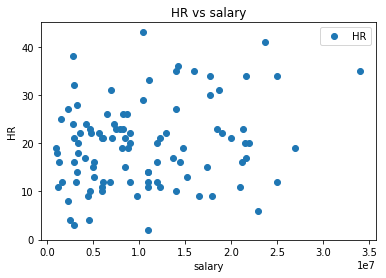

In [12]:
df.plot(x='Salary', y=label_to_correlate, style='o')
plt.title(label_to_correlate + ' vs salary')
plt.xlabel('salary')
plt.ylabel(label_to_correlate)
plt.show()

In [13]:
y_pred = regressor.predict(X_test)
y_pred.shape, y_test.shape

((20, 1), (20, 1))

In [14]:
res_df = pd.DataFrame({'Actual': y_test[:, 0], 'Predicted': y_pred[:, 0]})
res_df

,Actual,Predicted
0,36.0,20.278401
1,32.0,17.164307
2,12.0,23.232211
3,19.0,18.606865
4,4.0,17.626842
5,27.0,16.994864
6,23.0,21.446187
7,10.0,17.654319
8,26.0,18.629763
9,25.0,16.775046


In [31]:
print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error: 7.1191752806466955
Mean Squared Error: 77.23061410697822
Root Mean Squared Error 8.788095021503706


In [32]:
predict_player = input('Which player would you like to evaluate?')

Which player would you like to evaluate?Giancarlo Stanton


In [33]:
predict_player

'Giancarlo Stanton'

In [34]:
full_regressor = LinearRegression()
# remove player from dataset
df_player_removed = df[df['Name'] != predict_player]
X_player_removed = df_player_removed.loc[:, 'Salary']
y_player_removed = df_player_removed.loc[:, label_to_correlate]
X_player_removed = X_player_removed.values.reshape(len(X_player_removed), 1)
y_player_removed = y_player_removed.values.reshape(len(y_player_removed), 1)
full_regressor.fit(X_player_removed, y_player_removed)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
print(full_regressor.intercept_)
print(full_regressor.coef_)

[17.06988212]
[[2.31766108e-07]]


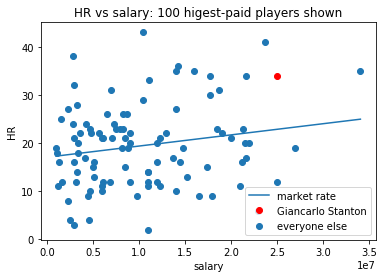

In [36]:
scatter = plt.scatter(df_player_removed['Salary'], df_player_removed[label_to_correlate], label='everyone else')
line = ln.Line2D(X_player_removed, full_regressor.predict(X_player_removed), label='market rate')
plt.plot(line.get_xdata(), line.get_ydata(), label='market rate')
player = plt.plot(df[df['Name'] == predict_player]['Salary'], df[df['Name'] == predict_player][label_to_correlate], 'ro', label=predict_player)
plt.title(label_to_correlate + ' vs salary: {} higest-paid players shown'.format(len(X)))
plt.xlabel('salary')
plt.ylabel(label_to_correlate)
plt.legend()
plt.show()